In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_obj = load_iris()
iris_data = iris_obj.data
species = iris_obj.target
iris_data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

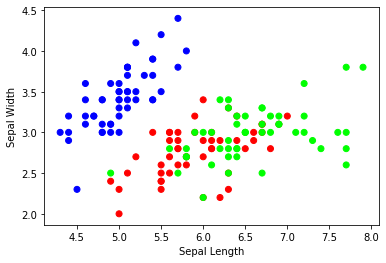

In [3]:
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=species, cmap=plt.cm.brg)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
irisclust = KMeans(n_clusters=3, init='random')    # Three clusters with cluster centers chosen as random dataset points
irisclust.fit(iris_data)
irisclust.cluster_centers_    # The coordinates of cluster centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

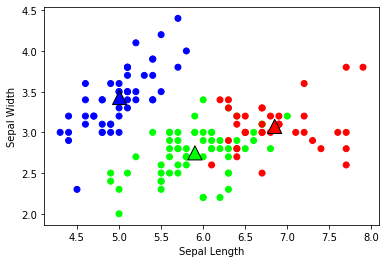

In [6]:
# Visualizing the clustering
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=irisclust.predict(iris_data), cmap=plt.cm.brg)
plt.scatter(irisclust.cluster_centers_[:, 0], irisclust.cluster_centers_[:, 1],
            c=irisclust.predict(irisclust.cluster_centers_), cmap=plt.cm.brg, marker='^', s=200,
            edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

## Image Compression with K-Means

In [7]:
from sklearn.datasets import load_sample_image
from PIL import Image
import numpy as np

In [8]:
frog = np.array(Image.open("frog.png").convert("RGB")) / 255    # The last division to force numbers to be in [0,1]

In [9]:
frog.shape

(460, 550, 3)

In [10]:
frog[:5, :5, 0]

array([[0.09803922, 0.0627451 , 0.06666667, 0.09411765, 0.09019608],
       [0.08627451, 0.04705882, 0.05098039, 0.08235294, 0.07843137],
       [0.09411765, 0.05490196, 0.06666667, 0.09019608, 0.07843137],
       [0.1254902 , 0.09411765, 0.09803922, 0.12156863, 0.10196078],
       [0.14509804, 0.11764706, 0.1254902 , 0.14509804, 0.1254902 ]])

In [11]:
frog[:5, :5, 1]

array([[0.11372549, 0.08235294, 0.08627451, 0.10588235, 0.10588235],
       [0.10588235, 0.07058824, 0.0745098 , 0.09803922, 0.09411765],
       [0.11764706, 0.08235294, 0.08235294, 0.10980392, 0.09803922],
       [0.15686275, 0.11372549, 0.11764706, 0.14509804, 0.1254902 ],
       [0.16470588, 0.1372549 , 0.14901961, 0.17254902, 0.15294118]])

In [12]:
frog[:5, :5, 2]

array([[0.10980392, 0.06666667, 0.05882353, 0.07058824, 0.05098039],
       [0.07843137, 0.03137255, 0.02745098, 0.04313725, 0.02745098],
       [0.0627451 , 0.01960784, 0.01568627, 0.03137255, 0.01176471],
       [0.0745098 , 0.02745098, 0.02745098, 0.04313725, 0.01568627],
       [0.07843137, 0.04705882, 0.04705882, 0.05098039, 0.02352941]])

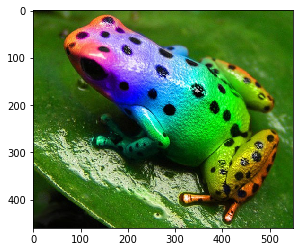

In [13]:
plt.imshow(frog)

In [14]:
def kmeans_compression(img, n_clusters):
    """Recolors an image when colors are clustered using the k-means algorithm"""
    h, w, d = img.shape
    assert d == 3
    img_data = img.reshape(h * w, d)    # The new array should have a row per pixel
    img_clust = KMeans(n_clusters=n_clusters, init='random').fit(img_data)    # The actual k-means clustering step
    centroids = img_clust.cluster_centers_    # The RGB (normalized) values for the new pixels
    clust_pixels = img_clust.predict(img_data)    # Which pixel gets which new value
    new_img_data = centroids[clust_pixels]
    return new_img_data.reshape(h, w, d)

In [15]:
newfrog = kmeans_compression(frog, 10)

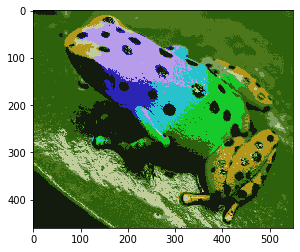

In [16]:
plt.imshow(newfrog)